In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('다목적댐_운영_정보(시자료)_2024년_11월.csv')
df

,dam_nm,msmt_tm,rsvr_wal_hg,rain_qy,inflow_qy,tot_dcwtr_qy,rsvwt_qy,dam_rsvwt_rt
0,주암(본),2024113024,107.1075,0.0,0.000,16.514,369.5589,80.9
1,주암(본),2024113023,107.1107,0.0,13.971,16.054,369.6390,80.9
2,주암(본),2024113022,107.1110,0.0,2.618,16.535,369.6465,80.9
3,주암(본),2024113021,107.1130,0.0,2.293,16.876,369.6966,80.9
4,주암(본),2024113020,107.1151,0.0,20.348,16.876,369.7491,80.9
...,...,...,...,...,...,...,...,...
15115,소양강,2024110223,190.0491,0.0,6.528,0.000,2257.9871,77.9
15116,소양강,2024110222,190.0487,0.0,10.623,2.484,2257.9636,77.9
15117,소양강,2024110221,190.0482,0.0,150.003,84.753,2257.9343,77.9
15118,소양강,2024110402,190.0918,0.0,75.083,0.000,2260.4954,78.0


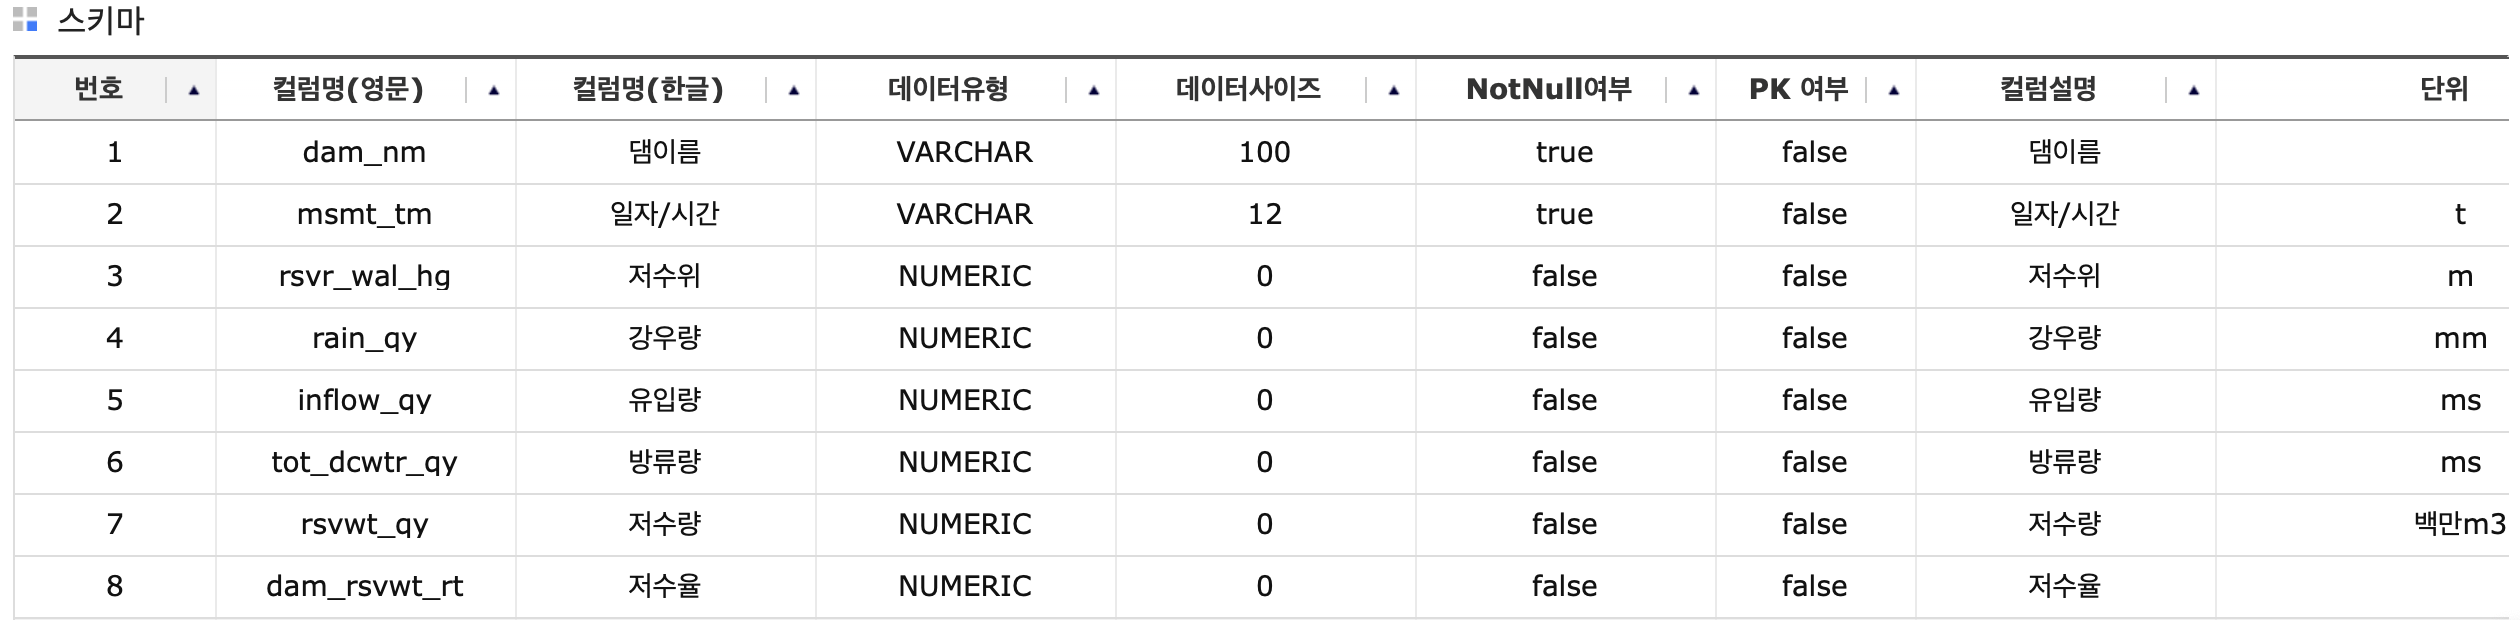

In [3]:
from IPython.display import Image
Image('스키마.png')

강우량과 유입량 비교


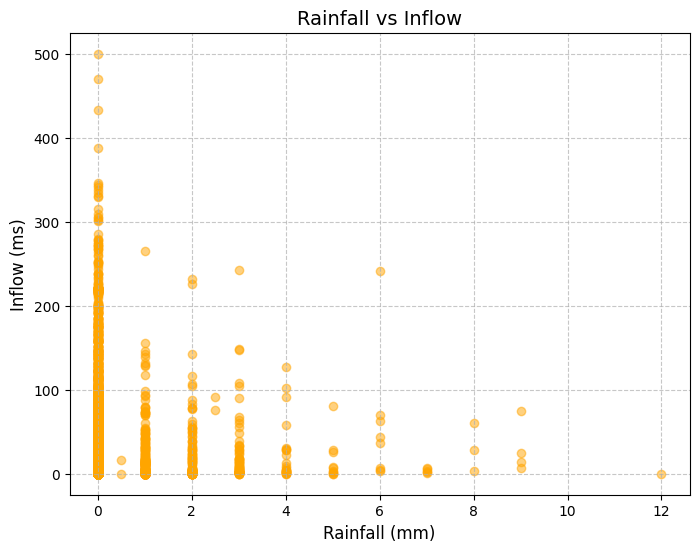

In [4]:
# 강우량(rain_qy)과 유입량(inflow_qy) 시각화 (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['rain_qy'], df['inflow_qy'], alpha=0.5, color='orange')
plt.title("Rainfall vs Inflow", fontsize=14)
plt.xlabel("Rainfall (mm)", fontsize=12)
plt.ylabel("Inflow (ms)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

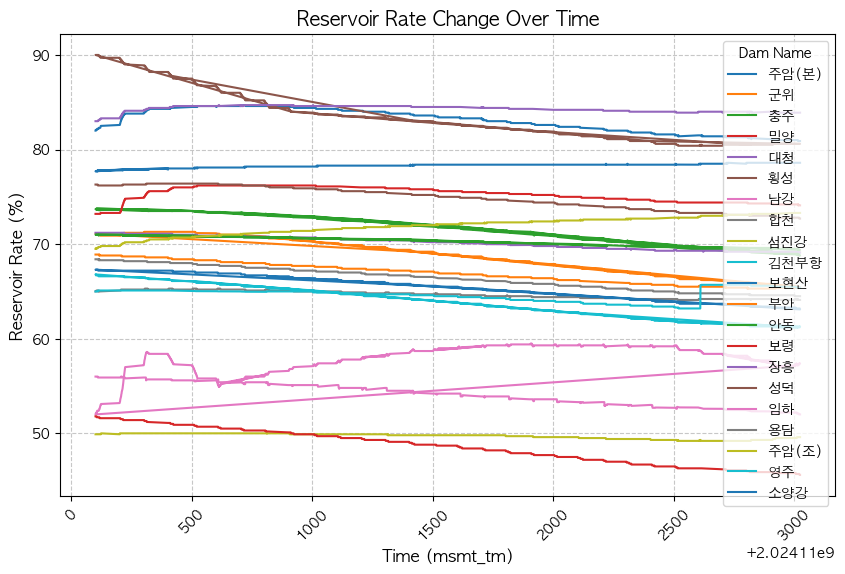

In [13]:
import matplotlib.pyplot as plt

# 시간에 따른 저수율 변화
plt.figure(figsize=(10, 6))
for dam in df['dam_nm'].unique():
    dam_data = df[df['dam_nm'] == dam]
    plt.plot(dam_data['msmt_tm'], dam_data['dam_rsvwt_rt'], label=dam)

plt.title("Reservoir Rate Change Over Time", fontsize=14)
plt.xlabel("Time (msmt_tm)", fontsize=12)
plt.ylabel("Reservoir Rate (%)", fontsize=12)
plt.legend(title="Dam Name")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 피드백 : 경기도 지역과 같이 그룹핑해서 한번에 보였으면 좋겠다.


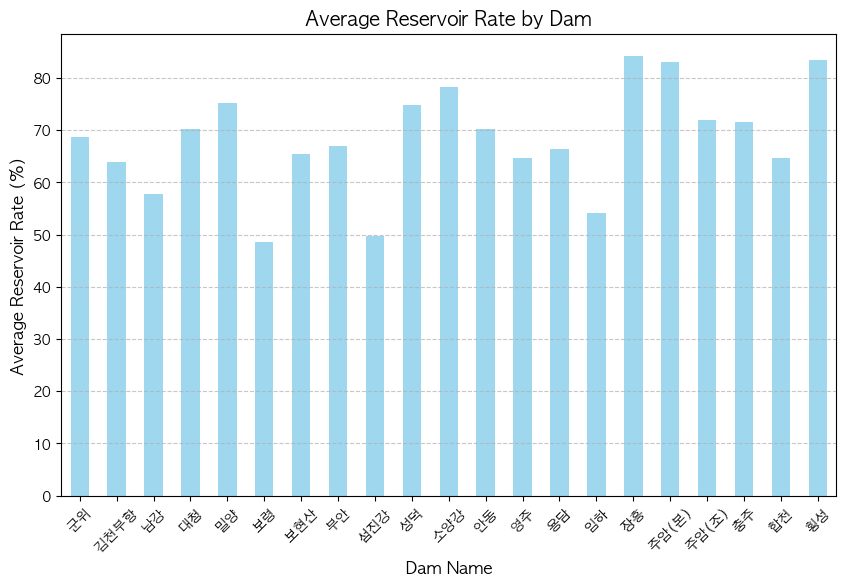

In [14]:
# 댐별 평균 저수율 계산
avg_reservoir_rate = df.groupby('dam_nm')['dam_rsvwt_rt'].mean()

# 바 그래프 생성
plt.figure(figsize=(10, 6))
avg_reservoir_rate.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Average Reservoir Rate by Dam", fontsize=14)
plt.xlabel("Dam Name", fontsize=12)
plt.ylabel("Average Reservoir Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

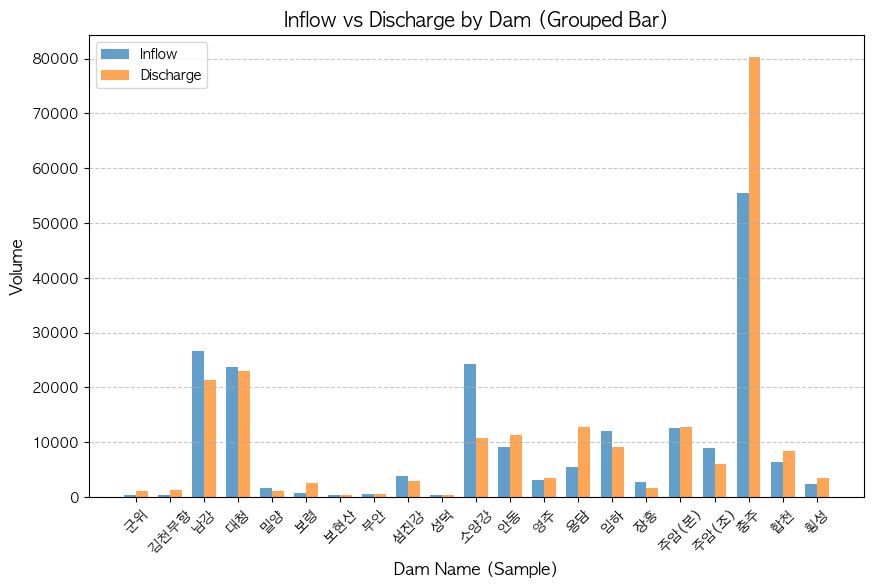

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 샘플링
grouped_data = df.groupby('dam_nm')[['inflow_qy', 'tot_dcwtr_qy']].sum().reset_index()
index = np.arange(len(grouped_data))

# 병렬 막대 그래프
bar_width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(index, grouped_data['inflow_qy'], bar_width, label="Inflow", alpha=0.7)
plt.bar(index + bar_width, grouped_data['tot_dcwtr_qy'], bar_width, label="Discharge", alpha=0.7)

plt.title("Inflow vs Discharge by Dam (Grouped Bar)", fontsize=14)
plt.xlabel("Dam Name (Sample)", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(index + bar_width / 2, grouped_data['dam_nm'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

# 시스템이 MacOS인지 확인
if platform.system() == 'Darwin':  # MacOS일 경우
    rc('font', family='AppleGothic')  # AppleGothic을 기본 폰트로 설정
else:  # 그 외 시스템
    rc('font', family='NanumGothic')  # NanumGothic 사용

# 유니코드 마이너스(-) 기호 처리
plt.rcParams['axes.unicode_minus'] = False

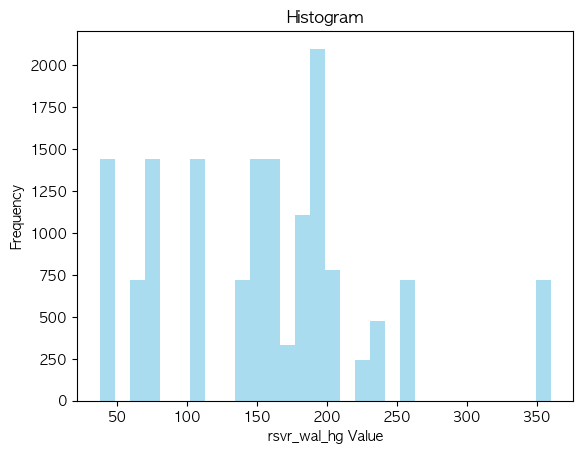

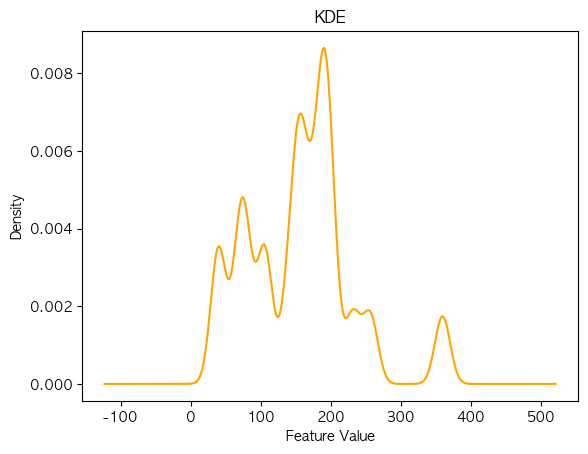

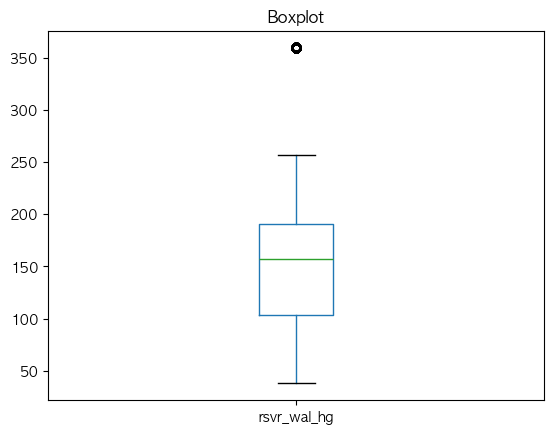

In [27]:
# 히스토그램
df['rsvr_wal_hg'].plot(kind='hist', bins=30, color='skyblue', alpha=0.7, title="Histogram")
plt.xlabel('rsvr_wal_hg Value')
plt.ylabel('Frequency')
plt.show()

# KDE
df['rsvr_wal_hg'].plot(kind='kde', color='orange', title="KDE")
plt.xlabel('Feature Value')
plt.show()

# 박스플롯
df.boxplot(column='rsvr_wal_hg', grid=False)
plt.title("Boxplot")
plt.show()

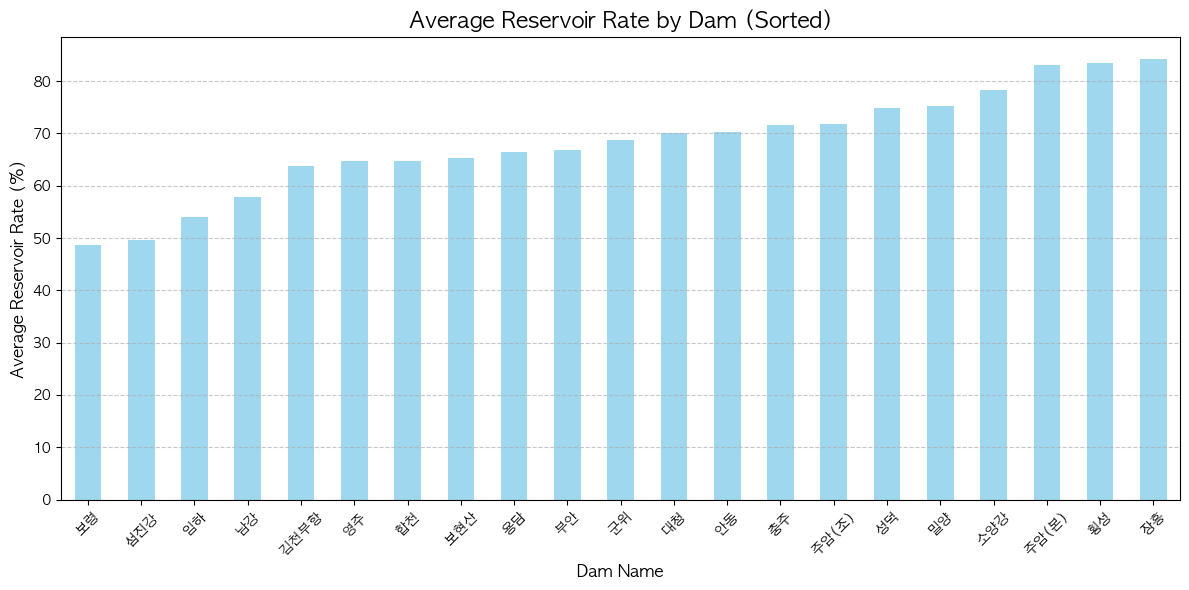

In [19]:
# 댐별 저수율 평균 계산 및 정렬
avg_reservoir_rate = df.groupby('dam_nm')['dam_rsvwt_rt'].mean().sort_values()

# 바 그래프 생성
plt.figure(figsize=(12, 6))
avg_reservoir_rate.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Average Reservoir Rate by Dam (Sorted)", fontsize=16)
plt.xlabel("Dam Name", fontsize=12)
plt.ylabel("Average Reservoir Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

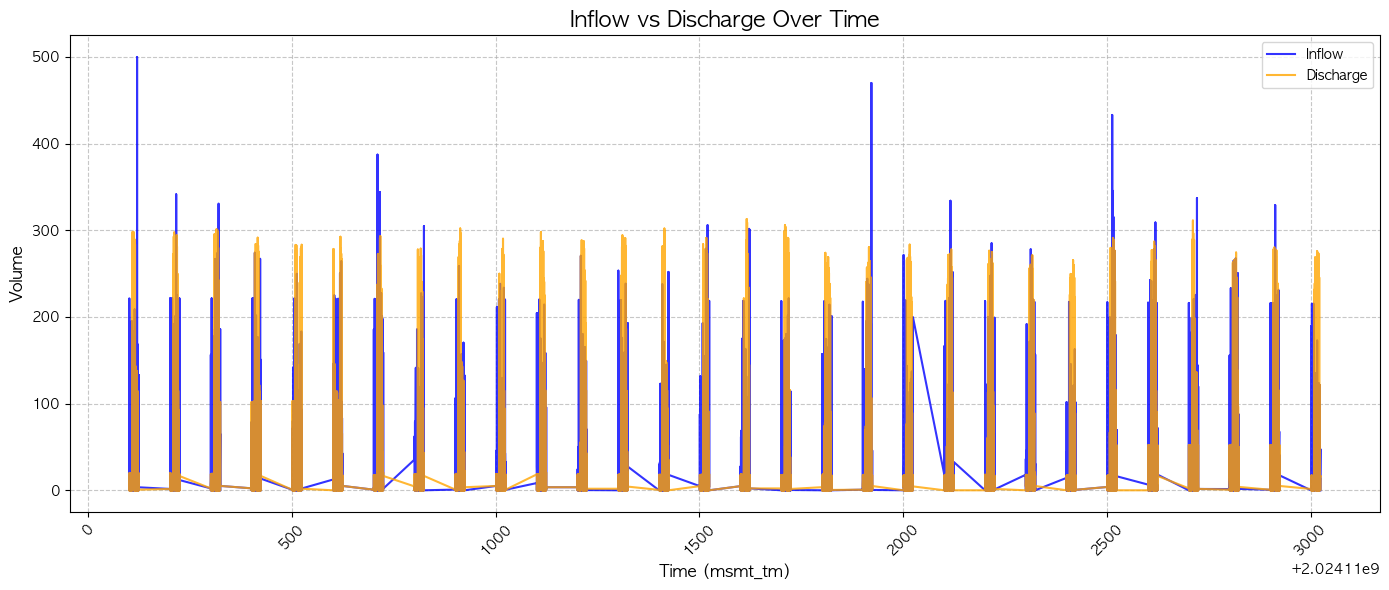

In [20]:
# 시간 순으로 정렬
df_sorted = df.sort_values(by='msmt_tm')

# 선 그래프 생성
plt.figure(figsize=(14, 6))
plt.plot(df_sorted['msmt_tm'], df_sorted['inflow_qy'], label="Inflow", alpha=0.8, color='blue')
plt.plot(df_sorted['msmt_tm'], df_sorted['tot_dcwtr_qy'], label="Discharge", alpha=0.8, color='orange')
plt.title("Inflow vs Discharge Over Time", fontsize=16)
plt.xlabel("Time (msmt_tm)", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

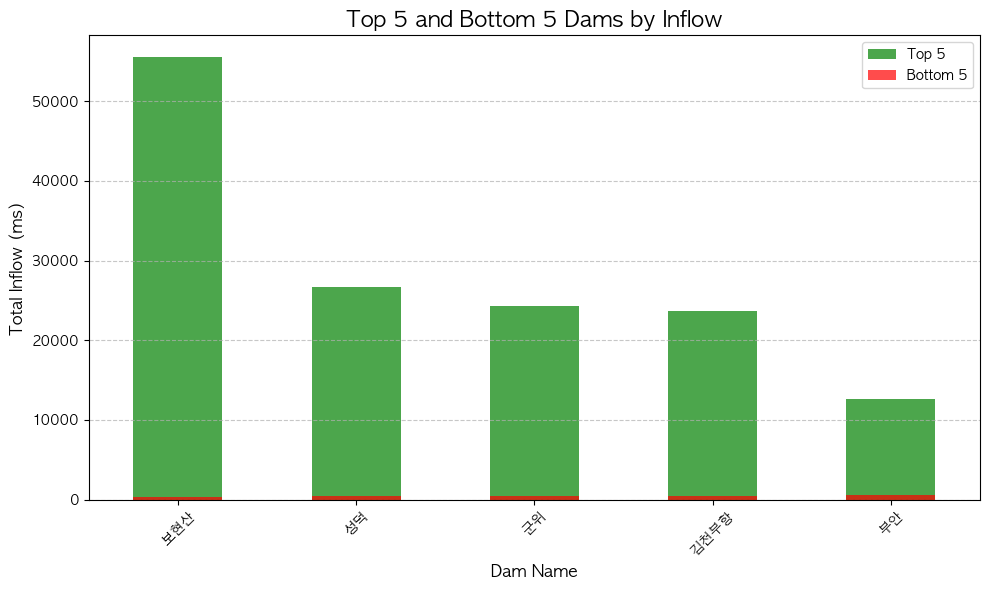

In [23]:
# 유입량 상위 및 하위 5개 댐 추출
top_5_inflow = df.groupby('dam_nm')['inflow_qy'].sum().nlargest(5)
bottom_5_inflow = df.groupby('dam_nm')['inflow_qy'].sum().nsmallest(5)

# 그래프 생성
plt.figure(figsize=(10, 6))
top_5_inflow.plot(kind='bar', color='green', alpha=0.7, label='Top 5')
bottom_5_inflow.plot(kind='bar', color='red', alpha=0.7, label='Bottom 5')
plt.title("Top 5 and Bottom 5 Dams by Inflow", fontsize=16)
plt.xlabel("Dam Name", fontsize=12)
plt.ylabel("Total Inflow (ms)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

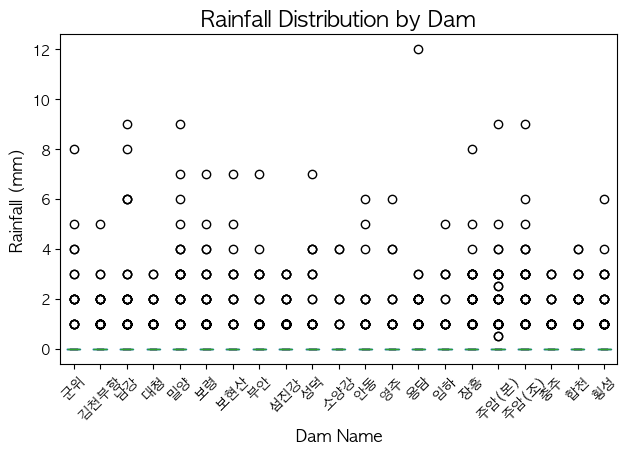

In [24]:
plt.figure(figsize=(12, 6))
df.boxplot(column='rain_qy', by='dam_nm', grid=False, showfliers=True)
plt.title("Rainfall Distribution by Dam", fontsize=16)
plt.suptitle("")  # Remove default title
plt.xlabel("Dam Name", fontsize=12)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()